In [28]:
# Ames house prices predition
# competition link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

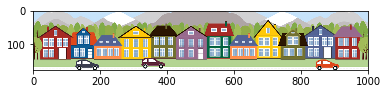

In [29]:
img = mpimg.imread('housesbanner.png')
imgplot = plt.imshow(img)
plt.show()

In [30]:
# reading data 89

train = pd.read_csv('data/train.csv')
train.set_index('Id',  inplace=True)

test = pd.read_csv('data/test.csv')
test.set_index('Id',  inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,IN,Reg,Lvl,AllPub,Inside,...,0,IN,IN,IN,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,IN,Reg,Lvl,AllPub,FR2,...,0,IN,IN,IN,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,IN,IR1,Lvl,AllPub,Inside,...,0,IN,IN,IN,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,IN,IR1,Lvl,AllPub,Corner,...,0,IN,IN,IN,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,IN,IR1,Lvl,AllPub,FR2,...,0,IN,IN,IN,0,12,2008,WD,Normal,250000


In [31]:
features = train.columns.values
print('Features: ', len(features))

Features:  80


In [32]:
train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
# description of the result variable

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

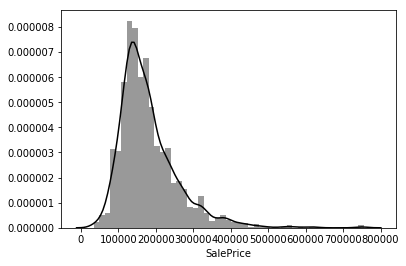

In [44]:
# histogram of saleprice

sn.distplot(train['SalePrice'], color="black", );

In [35]:
# combining train and test

data = pd.concat([train, test], keys=['train', 'test'])
len(data)

2919

In [42]:
# dealing with empty values

missing_per_col = (data.isnull().sum())
percentage = (missing_per_col * 100)/ len(data)
print(percentage[percentage > 0.0])

SalePrice    49.982871
dtype: float64
